## Assignment 3 - Question 1:
DNN model on Pima Indian Diabetic Dataset

Submitted by - Parag Shah

### Import the packages and Read in the data

In [116]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import pandas as pd
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib import pyplot as plt

%matplotlib inline

In [117]:
%pwd

'/Users/paragshah/Desktop/Semester 1/INFO 6105 DS/Assignments/Assignment_3_Parag/Question 1'

In [118]:
!ls

Assignment 3 - Question 1.ipynb diabetes.csv


In [119]:
path = %pwd
print(path)

/Users/paragshah/Desktop/Semester 1/INFO 6105 DS/Assignments/Assignment_3_Parag/Question 1


In [120]:
df = pd.read_csv(f'{path}/diabetes.csv')
print(df.shape)
df.head(2)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### Pre-process data, train-test split

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No null rows in any column so need of imputation in this dataset

In [122]:
#Separate out X and Y

X_df = df.iloc[:, :8]
Y_df = df.iloc[:, 8:9]

In [123]:
print(X_df.head(3), '\n', Y_df.head(3))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32   
    Outcome
0        1
1        0
2        1


In [124]:
print(X_df.shape, Y_df.shape)

(768, 8) (768, 1)


### Scaling the data

In [125]:
scaler = preprocessing.StandardScaler().fit(X_df)
X_scale = pd.DataFrame(scaler.transform(X_df))
X_scale.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### Train - Valid - Test Split

In [126]:
# Train - Valid Split
(X_train, X_valid_test, Y_train, Y_valid_test) = train_test_split(X_scale, Y_df, test_size=0.3, random_state=1)
print(X_train.shape, X_valid_test.shape, Y_train.shape, Y_valid_test.shape)

(537, 8) (231, 8) (537, 1) (231, 1)


In [127]:
#Valid - Test split (divide valid dataset into 2 halves)
(X_valid, X_test, Y_valid, Y_test) = train_test_split(X_valid_test, Y_valid_test, test_size=0.5, random_state=1)
print(X_valid.shape, X_test.shape, Y_valid.shape, Y_test.shape)

(115, 8) (116, 8) (115, 1) (116, 1)


### Build and compile a deep learning model

In [128]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [129]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [130]:
# Fit the DNN with your train data

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=5)

Train on 537 samples, validate on 116 samples
Epoch 1/100
537/537 [==============================] - 1s 2ms/step - loss: 0.6849 - accuracy: 0.6574 - val_loss: 0.6740 - val_accuracy: 0.6121
Epoch 2/100
537/537 [==============================] - 0s 368us/step - loss: 0.6230 - accuracy: 0.6629 - val_loss: 0.5816 - val_accuracy: 0.6379
Epoch 3/100
537/537 [==============================] - 0s 354us/step - loss: 0.5370 - accuracy: 0.7430 - val_loss: 0.5197 - val_accuracy: 0.7759
Epoch 4/100
537/537 [==============================] - 0s 353us/step - loss: 0.4985 - accuracy: 0.7616 - val_loss: 0.4917 - val_accuracy: 0.7931
Epoch 5/100
537/537 [==============================] - 0s 343us/step - loss: 0.4855 - accuracy: 0.7635 - val_loss: 0.4845 - val_accuracy: 0.8017
Epoch 6/100
537/537 [==============================] - 0s 361us/step - loss: 0.4795 - accuracy: 0.7616 - val_loss: 0.4837 - val_accuracy: 0.7931
Epoch 7/100
537/537 [==============================] - 0s 344us/step - loss: 0.4758 - 

Epoch 57/100
537/537 [==============================] - 0s 366us/step - loss: 0.4508 - accuracy: 0.7765 - val_loss: 0.4621 - val_accuracy: 0.8103
Epoch 58/100
537/537 [==============================] - 0s 361us/step - loss: 0.4505 - accuracy: 0.7803 - val_loss: 0.4632 - val_accuracy: 0.8103
Epoch 59/100
537/537 [==============================] - 0s 347us/step - loss: 0.4504 - accuracy: 0.7784 - val_loss: 0.4629 - val_accuracy: 0.8103
Epoch 60/100
537/537 [==============================] - 0s 373us/step - loss: 0.4507 - accuracy: 0.7784 - val_loss: 0.4634 - val_accuracy: 0.8103
Epoch 61/100
537/537 [==============================] - 0s 370us/step - loss: 0.4503 - accuracy: 0.7765 - val_loss: 0.4634 - val_accuracy: 0.8103
Epoch 62/100
537/537 [==============================] - 0s 354us/step - loss: 0.4496 - accuracy: 0.7784 - val_loss: 0.4613 - val_accuracy: 0.8103
Epoch 63/100
537/537 [==============================] - 0s 355us/step - loss: 0.4486 - accuracy: 0.7784 - val_loss: 0.4623 -

In [131]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

116/116 [==============================] - 0s 40us/step
Accuracy: 79.31%


### Hyperparameter tuning

In [149]:
def model_fn():
    model1 = Sequential()
    model1.add(Dense(10, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model1.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model1

In [150]:
model2 = KerasClassifier(build_fn=model_fn, epochs=100, batch_size=10)

In [151]:
model2 = KerasClassifier(build_fn=model_fn)
batch_sizes = [2, 5, 10, 20]
epochs_list = [10, 25, 40]
parameters = dict(batch_size=batch_sizes, epochs=epochs_list)

In [152]:
grid = GridSearchCV(estimator=model2, param_grid=parameters)
grid.fit(X_valid, Y_valid)

Epoch 1/10
92/92 [==============================] - 1s 8ms/step - loss: 0.6910 - accuracy: 0.6630
Epoch 2/10
92/92 [==============================] - 0s 943us/step - loss: 0.6856 - accuracy: 0.6848
Epoch 3/10
92/92 [==============================] - 0s 850us/step - loss: 0.6785 - accuracy: 0.6848
Epoch 4/10
92/92 [==============================] - 0s 865us/step - loss: 0.6661 - accuracy: 0.6848
Epoch 5/10
92/92 [==============================] - 0s 864us/step - loss: 0.6458 - accuracy: 0.6848
Epoch 6/10
92/92 [==============================] - 0s 923us/step - loss: 0.6098 - accuracy: 0.6848
Epoch 7/10
92/92 [==============================] - 0s 815us/step - loss: 0.5624 - accuracy: 0.6848
Epoch 8/10
92/92 [==============================] - 0s 812us/step - loss: 0.5143 - accuracy: 0.6848
Epoch 9/10
92/92 [==============================] - 0s 833us/step - loss: 0.4826 - accuracy: 0.6848
Epoch 10/10
23/23 [==============================] - 0s 5ms/step
Epoch 1/10
92/92 [===================

92/92 [==============================] - 0s 789us/step - loss: 0.3908 - accuracy: 0.8261
Epoch 10/25
92/92 [==============================] - 0s 782us/step - loss: 0.3733 - accuracy: 0.8478
Epoch 11/25
92/92 [==============================] - 0s 774us/step - loss: 0.3582 - accuracy: 0.8587
Epoch 12/25
92/92 [==============================] - 0s 786us/step - loss: 0.3482 - accuracy: 0.8587
Epoch 13/25
92/92 [==============================] - 0s 776us/step - loss: 0.3408 - accuracy: 0.8587
Epoch 14/25
92/92 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8696
Epoch 15/25
92/92 [==============================] - 0s 770us/step - loss: 0.3266 - accuracy: 0.8804
Epoch 16/25
92/92 [==============================] - 0s 777us/step - loss: 0.3232 - accuracy: 0.8804
Epoch 17/25
92/92 [==============================] - 0s 835us/step - loss: 0.3182 - accuracy: 0.8804
Epoch 18/25
92/92 [==============================] - 0s 782us/step - loss: 0.3162 - accuracy: 0.8804
Epoc

92/92 [==============================] - 0s 796us/step - loss: 0.3269 - accuracy: 0.8261
Epoch 25/40
92/92 [==============================] - 0s 791us/step - loss: 0.3238 - accuracy: 0.8261
Epoch 26/40
92/92 [==============================] - 0s 790us/step - loss: 0.3233 - accuracy: 0.8370
Epoch 27/40
92/92 [==============================] - 0s 820us/step - loss: 0.3211 - accuracy: 0.8370
Epoch 28/40
92/92 [==============================] - 0s 820us/step - loss: 0.3208 - accuracy: 0.8370
Epoch 29/40
92/92 [==============================] - 0s 834us/step - loss: 0.3170 - accuracy: 0.8370
Epoch 30/40
92/92 [==============================] - 0s 819us/step - loss: 0.3166 - accuracy: 0.8370
Epoch 31/40
92/92 [==============================] - 0s 786us/step - loss: 0.3164 - accuracy: 0.8370
Epoch 32/40
92/92 [==============================] - 0s 817us/step - loss: 0.3105 - accuracy: 0.8370
Epoch 33/40
92/92 [==============================] - 0s 923us/step - loss: 0.3102 - accuracy: 0.8370
Ep

92/92 [==============================] - 0s 320us/step - loss: 0.6907 - accuracy: 0.6630
Epoch 3/25
92/92 [==============================] - 0s 314us/step - loss: 0.6870 - accuracy: 0.6630
Epoch 4/25
92/92 [==============================] - 0s 318us/step - loss: 0.6820 - accuracy: 0.6630
Epoch 5/25
92/92 [==============================] - 0s 310us/step - loss: 0.6721 - accuracy: 0.6630
Epoch 6/25
92/92 [==============================] - 0s 311us/step - loss: 0.6558 - accuracy: 0.6630
Epoch 7/25
92/92 [==============================] - 0s 317us/step - loss: 0.6328 - accuracy: 0.6739
Epoch 8/25
92/92 [==============================] - 0s 311us/step - loss: 0.6025 - accuracy: 0.6739
Epoch 9/25
92/92 [==============================] - 0s 313us/step - loss: 0.5688 - accuracy: 0.7500
Epoch 10/25
92/92 [==============================] - 0s 330us/step - loss: 0.5335 - accuracy: 0.7500
Epoch 11/25
92/92 [==============================] - 0s 328us/step - loss: 0.5035 - accuracy: 0.8043
Epoch 12/

92/92 [==============================] - 0s 322us/step - loss: 0.6182 - accuracy: 0.6848
Epoch 8/40
92/92 [==============================] - 0s 320us/step - loss: 0.5823 - accuracy: 0.6848
Epoch 9/40
92/92 [==============================] - 0s 315us/step - loss: 0.5414 - accuracy: 0.6848
Epoch 10/40
92/92 [==============================] - 0s 320us/step - loss: 0.5052 - accuracy: 0.6848
Epoch 11/40
92/92 [==============================] - 0s 314us/step - loss: 0.4782 - accuracy: 0.6848
Epoch 12/40
92/92 [==============================] - 0s 335us/step - loss: 0.4639 - accuracy: 0.6848
Epoch 13/40
92/92 [==============================] - 0s 322us/step - loss: 0.4514 - accuracy: 0.6848
Epoch 14/40
92/92 [==============================] - 0s 314us/step - loss: 0.4447 - accuracy: 0.6848
Epoch 15/40
92/92 [==============================] - 0s 315us/step - loss: 0.4397 - accuracy: 0.6848
Epoch 16/40
92/92 [==============================] - 0s 320us/step - loss: 0.4348 - accuracy: 0.6848
Epoc

92/92 [==============================] - 0s 320us/step - loss: 0.6484 - accuracy: 0.7609
Epoch 8/40
92/92 [==============================] - 0s 328us/step - loss: 0.6232 - accuracy: 0.8043
Epoch 9/40
92/92 [==============================] - 0s 320us/step - loss: 0.5929 - accuracy: 0.8261
Epoch 10/40
92/92 [==============================] - 0s 318us/step - loss: 0.5572 - accuracy: 0.8261
Epoch 11/40
92/92 [==============================] - 0s 322us/step - loss: 0.5205 - accuracy: 0.8152
Epoch 12/40
92/92 [==============================] - 0s 318us/step - loss: 0.4844 - accuracy: 0.8043
Epoch 13/40
92/92 [==============================] - 0s 327us/step - loss: 0.4534 - accuracy: 0.8043
Epoch 14/40
92/92 [==============================] - 0s 317us/step - loss: 0.4276 - accuracy: 0.8043
Epoch 15/40
92/92 [==============================] - 0s 320us/step - loss: 0.4068 - accuracy: 0.8152
Epoch 16/40
92/92 [==============================] - 0s 320us/step - loss: 0.3924 - accuracy: 0.8370
Epoc

23/23 [==============================] - 0s 4ms/step
Epoch 1/25
92/92 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.6196
Epoch 2/25
92/92 [==============================] - 0s 228us/step - loss: 0.6917 - accuracy: 0.6196
Epoch 3/25
92/92 [==============================] - 0s 211us/step - loss: 0.6905 - accuracy: 0.6196
Epoch 4/25
92/92 [==============================] - 0s 220us/step - loss: 0.6891 - accuracy: 0.6196
Epoch 5/25
92/92 [==============================] - 0s 222us/step - loss: 0.6867 - accuracy: 0.6196
Epoch 6/25
92/92 [==============================] - 0s 216us/step - loss: 0.6832 - accuracy: 0.6196
Epoch 7/25
92/92 [==============================] - 0s 194us/step - loss: 0.6785 - accuracy: 0.6196
Epoch 8/25
92/92 [==============================] - 0s 194us/step - loss: 0.6718 - accuracy: 0.6196
Epoch 9/25
92/92 [==============================] - 0s 190us/step - loss: 0.6631 - accuracy: 0.6196
Epoch 10/25
92/92 [==============================

92/92 [==============================] - 0s 189us/step - loss: 0.4051 - accuracy: 0.8478
Epoch 31/40
92/92 [==============================] - 0s 185us/step - loss: 0.4005 - accuracy: 0.8478
Epoch 32/40
92/92 [==============================] - 0s 190us/step - loss: 0.3948 - accuracy: 0.8478
Epoch 33/40
92/92 [==============================] - 0s 188us/step - loss: 0.3901 - accuracy: 0.8261
Epoch 34/40
92/92 [==============================] - 0s 183us/step - loss: 0.3853 - accuracy: 0.8261
Epoch 35/40
92/92 [==============================] - 0s 180us/step - loss: 0.3817 - accuracy: 0.8261
Epoch 36/40
92/92 [==============================] - 0s 183us/step - loss: 0.3775 - accuracy: 0.8261
Epoch 37/40
92/92 [==============================] - 0s 185us/step - loss: 0.3736 - accuracy: 0.8261
Epoch 38/40
92/92 [==============================] - 0s 180us/step - loss: 0.3701 - accuracy: 0.8261
Epoch 39/40
92/92 [==============================] - 0s 181us/step - loss: 0.3656 - accuracy: 0.8152
Ep

92/92 [==============================] - 0s 116us/step - loss: 0.6661 - accuracy: 0.6848
Epoch 19/25
92/92 [==============================] - 0s 103us/step - loss: 0.6626 - accuracy: 0.6848
Epoch 20/25
92/92 [==============================] - 0s 112us/step - loss: 0.6585 - accuracy: 0.6848
Epoch 21/25
92/92 [==============================] - 0s 115us/step - loss: 0.6537 - accuracy: 0.6848
Epoch 22/25
92/92 [==============================] - 0s 106us/step - loss: 0.6491 - accuracy: 0.6848
Epoch 23/25
92/92 [==============================] - 0s 104us/step - loss: 0.6434 - accuracy: 0.6848
Epoch 24/25
92/92 [==============================] - 0s 107us/step - loss: 0.6369 - accuracy: 0.6848
Epoch 25/25
23/23 [==============================] - 0s 5ms/step
Epoch 1/25
92/92 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.6739
Epoch 2/25
92/92 [==============================] - 0s 131us/step - loss: 0.6921 - accuracy: 0.6630
Epoch 3/25
92/92 [========================

Epoch 23/25
92/92 [==============================] - 0s 108us/step - loss: 0.6114 - accuracy: 0.7935
Epoch 24/25
92/92 [==============================] - 0s 102us/step - loss: 0.6007 - accuracy: 0.7935
Epoch 25/25
23/23 [==============================] - 0s 4ms/step
Epoch 1/25
92/92 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.6413
Epoch 2/25
92/92 [==============================] - 0s 110us/step - loss: 0.6925 - accuracy: 0.6304
Epoch 3/25
92/92 [==============================] - 0s 114us/step - loss: 0.6920 - accuracy: 0.6304
Epoch 4/25
92/92 [==============================] - 0s 108us/step - loss: 0.6914 - accuracy: 0.6304
Epoch 5/25
92/92 [==============================] - 0s 125us/step - loss: 0.6907 - accuracy: 0.6304
Epoch 6/25
92/92 [==============================] - 0s 126us/step - loss: 0.6901 - accuracy: 0.6304
Epoch 7/25
92/92 [==============================] - 0s 115us/step - loss: 0.6895 - accuracy: 0.6304
Epoch 8/25
92/92 [=================

92/92 [==============================] - 0s 115us/step - loss: 0.6842 - accuracy: 0.6196
Epoch 13/40
92/92 [==============================] - 0s 109us/step - loss: 0.6823 - accuracy: 0.6196
Epoch 14/40
92/92 [==============================] - 0s 105us/step - loss: 0.6801 - accuracy: 0.6413
Epoch 15/40
92/92 [==============================] - 0s 111us/step - loss: 0.6776 - accuracy: 0.6848
Epoch 16/40
92/92 [==============================] - 0s 102us/step - loss: 0.6744 - accuracy: 0.7174
Epoch 17/40
92/92 [==============================] - 0s 100us/step - loss: 0.6711 - accuracy: 0.7935
Epoch 18/40
92/92 [==============================] - 0s 107us/step - loss: 0.6669 - accuracy: 0.8152
Epoch 19/40
92/92 [==============================] - 0s 106us/step - loss: 0.6621 - accuracy: 0.8043
Epoch 20/40
92/92 [==============================] - 0s 101us/step - loss: 0.6569 - accuracy: 0.8043
Epoch 21/40
92/92 [==============================] - 0s 111us/step - loss: 0.6513 - accuracy: 0.8261
Ep

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x1a968a2550>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [2, 5, 10, 20], 'epochs': [10, 25, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [153]:
print(grid.best_score_, grid.best_params_)

0.799999988079071 {'batch_size': 2, 'epochs': 40}


In [154]:
parameters = grid.cv_results_['params']
print(parameters)

[{'batch_size': 2, 'epochs': 10}, {'batch_size': 2, 'epochs': 25}, {'batch_size': 2, 'epochs': 40}, {'batch_size': 5, 'epochs': 10}, {'batch_size': 5, 'epochs': 25}, {'batch_size': 5, 'epochs': 40}, {'batch_size': 10, 'epochs': 10}, {'batch_size': 10, 'epochs': 25}, {'batch_size': 10, 'epochs': 40}, {'batch_size': 20, 'epochs': 10}, {'batch_size': 20, 'epochs': 25}, {'batch_size': 20, 'epochs': 40}]


In [155]:
# Apply best parameters found above
model2 = KerasClassifier(build_fn=model_fn, batch_size=2, epochs=40)

In [156]:
model2.fit(X_valid, Y_valid)

Epoch 1/40
115/115 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.6000
Epoch 2/40
115/115 [==============================] - 0s 857us/step - loss: 0.6890 - accuracy: 0.6522
Epoch 3/40
115/115 [==============================] - 0s 852us/step - loss: 0.6811 - accuracy: 0.6696
Epoch 4/40
115/115 [==============================] - 0s 861us/step - loss: 0.6578 - accuracy: 0.7652
Epoch 5/40
115/115 [==============================] - 0s 846us/step - loss: 0.6096 - accuracy: 0.8174
Epoch 6/40
115/115 [==============================] - 0s 848us/step - loss: 0.5485 - accuracy: 0.8174
Epoch 7/40
115/115 [==============================] - 0s 864us/step - loss: 0.4905 - accuracy: 0.8261
Epoch 8/40
115/115 [==============================] - 0s 855us/step - loss: 0.4490 - accuracy: 0.8174
Epoch 9/40
115/115 [==============================] - 0s 849us/step - loss: 0.4214 - accuracy: 0.8174
Epoch 10/40
115/115 [==============================] - 0s 843us/step - loss: 0.4019 

### Evaluate model performance on test dataset

In [157]:
scores = model2.score(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores*100))

116/116 [==============================] - 0s 1ms/step
Accuracy: 80.17%


### Epoch versus Train set accuracy and Valid set accuracy

In [158]:
# Fit the DNN with your train data

history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=40, batch_size=2)

Train on 537 samples, validate on 115 samples
Epoch 1/40
100/537 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.8200

/Users/paragshah/opt/anaconda3/envs/new_base/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


537/537 [==============================] - 1s 1ms/step - loss: 0.4475 - accuracy: 0.7858 - val_loss: 0.4392 - val_accuracy: 0.7913
Epoch 2/40
537/537 [==============================] - 0s 867us/step - loss: 0.4436 - accuracy: 0.7803 - val_loss: 0.4387 - val_accuracy: 0.7913
Epoch 3/40
537/537 [==============================] - 0s 892us/step - loss: 0.4436 - accuracy: 0.7914 - val_loss: 0.4395 - val_accuracy: 0.7913
Epoch 4/40
537/537 [==============================] - 0s 927us/step - loss: 0.4412 - accuracy: 0.7914 - val_loss: 0.4431 - val_accuracy: 0.8000
Epoch 5/40
537/537 [==============================] - 1s 947us/step - loss: 0.4420 - accuracy: 0.7840 - val_loss: 0.4430 - val_accuracy: 0.7913
Epoch 6/40
537/537 [==============================] - 0s 909us/step - loss: 0.4420 - accuracy: 0.7840 - val_loss: 0.4422 - val_accuracy: 0.7913
Epoch 7/40
537/537 [==============================] - 0s 868us/step - loss: 0.4402 - accuracy: 0.7840 - val_loss: 0.4450 - val_accuracy: 0.7826
Epoch

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


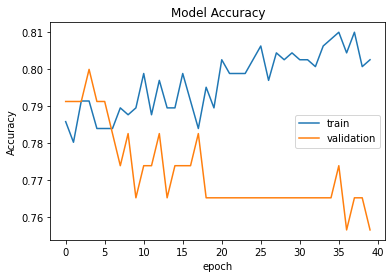

In [159]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

### ROC and AUC

In [164]:
Y_valid_pred = model.predict_proba(X_valid)

In [165]:
roc_auc_score(Y_valid, Y_valid_pred)

0.8506666666666667

In [166]:
rec, fall_out, thresholds = roc_curve(Y_valid, Y_valid_pred)

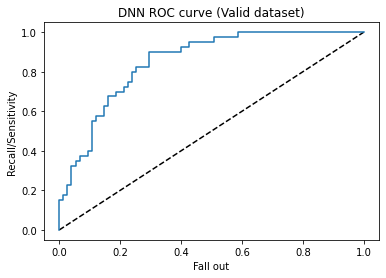

In [167]:
plt.plot([0,1],[0,1],'k--')
plt.plot(rec, fall_out, label='DNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('DNN ROC curve (Valid dataset)')
plt.show()

In [168]:
Y_test_pred = model.predict_proba(X_test)

In [169]:
roc_auc_score(Y_test, Y_test_pred)

0.860093896713615

In [170]:
rec, fall_out, thresholds = roc_curve(Y_test, Y_test_pred)

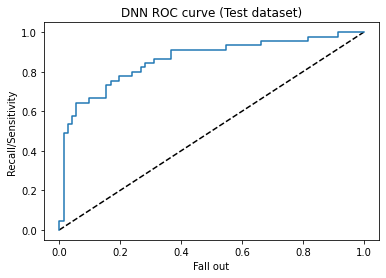

In [171]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(rec, fall_out, label='DNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('DNN ROC curve (Test dataset)')
plt.show()

#### End of file